# Quantum Machine Learning

Keywords : **qiskit Library, Quantum Circuits, Rotating Qubits, Variational Circuits, Quantum Neural Network Function, Stochastics Gradient Descent Rule, Loss Function, Learning Rate, Hyper Parameter, SVM, Train and Test Accuracy**

## Download qiskit and import libraries

In [1]:
!pip install qiskit

  Installing build dependencies ... - \ | done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ done
  Preparing metadata (pyproject.toml) ... - done
  Installing build dependencies ... - \ | done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 7.8 MB/s eta 0:00:00
  Created wheel for qiskit: 

In [2]:
from sklearn import model_selection, datasets, svm
from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister

## Dataset, train and test split func

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[0:100]
Y = iris.target[0:100]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.33,random_state=42)


In [5]:
Y_train

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1])

In [6]:
X_train[0]

array([5.2, 3.4, 1.4, 0.2])

In [7]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=bb51db0fdde962d6a6aeb3373c83ea66fa692b9705a8469ad62c60371e5a1643
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


## Quantum Circuits

* 4 Qubits => 4 features
* N = 4   (qO0, qO1, qO2, qO3)
* 1 classical Register cO (classical output)

In [8]:
print(X_train[0])

[5.2 3.4 1.4 0.2]


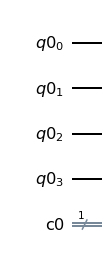

In [9]:
N=4
q = QuantumRegister(N)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.draw("mpl")

## Rotating the qubits around by these angles

* This rotates the qubits and then encodes those classical numbers onto the qubits (this can be done more complicated ways)
* Rotating the qubits is really just the simplest way of getting the data onto the quantum processor

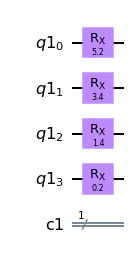

In [10]:
N=4
q = QuantumRegister(N)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

for i, x in enumerate(X_train[0]):
    qc.rx(x, i)

qc.draw("mpl")

* This process is called faeture map, we can map generally any data onto the quantum processor

In [11]:
N=4
def feature_map(X):

    q = QuantumRegister(N)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q, c)

    for i, x in enumerate(X):
        qc.rx(x, i)
    return qc, c 

* We need to get measure quantum circuit, we need to get output
* This measurement is going to be our prediction of the quantum circuit

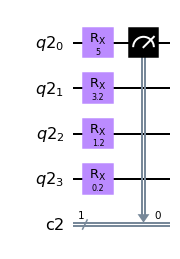

In [12]:
qc, c =feature_map(X_train[5])


# measurement operator
qc.measure(0,c)

qc.draw("mpl")

* The output can be either 0 or 1 
* I want to introduce variational circuit,
* I want to introduce more rotations that we are getting gonna be learning

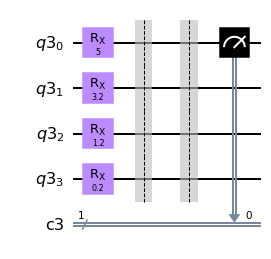

In [13]:
qc, c =feature_map(X_train[5])

qc.barrier()

qc.barrier()

# measurement operator
qc.measure(0,c)

qc.draw("mpl")

* In between those gray lines ı want to put some more rotations.
* These rotations will have angles that we want to learn, we want to optimize those angles such that the quantum circuit then predict the right label (0 or 1 ).

In [14]:
# right label in our case =>
print(Y_train[5])

0


## Variational Circuits

In [15]:
def variational_circuit(qc, theta):
      for i in range(N-1):
            qc.cnot(i,i+1)
      qc.cnot(N-1, 0)
      for i in range(N):
            qc.ry(theta[i], i)
      return qc

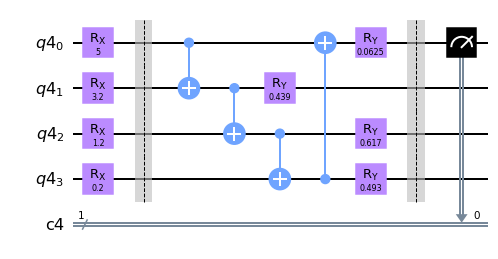

In [16]:
import numpy as np
qc, c =feature_map(X_train[5])

qc.barrier()

qc = variational_circuit(qc, np.random.rand(N))

qc.barrier()

# measurement operator
qc.measure(0,c)

qc.draw("mpl")

* Variational circuits contains rotations.
* I have put just random angles for illustration
* The goal is now that we want to learn those angles we want to learn optimal angles such that our quantum circuit outputs us right class

* Blue line are c not gates. they create entanglement, so they essentially allow information to travel from one qubit to another 
* I am measuring here the zeroth cubit (for output)

## What output we get

{'0': 4035, '1': 5965}
0.5965


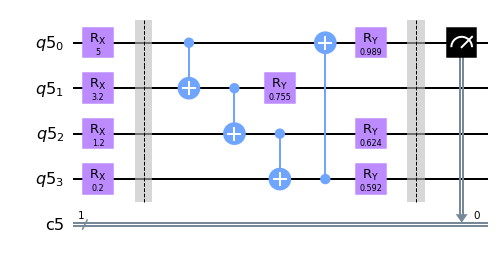

In [17]:
import qiskit 

qc, c =feature_map(X_train[5])

qc.barrier()

qc = variational_circuit(qc, np.random.rand(N))

qc.barrier()

# measurement operator
qc.measure(0,c)

shots = 1E4
backend = Aer.get_backend("qasm_simulator")
job = qiskit.execute(qc, backend, shots=shots)
result = job.result()
counts = result.get_counts(qc)
print(counts)
print(counts["1"]/shots)





qc.draw("mpl")

* Run quantum circuits 10000 times, ı have run it on quantum simulator "qasm_simulator" which simulates the quantum computer without any errors

* The prediction of this quantum circuit is 1
* But real => 0

In [18]:
print(Y_train[5])

0


* This make total sense because we have not train angles (thetas) yet. they are just random values.

## Quantum Neural Network Function

In [19]:
def quantum_nn(X, theta, simulator=True):

    qc, c = feature_map(X)
    qc = variational_circuit(qc, theta)
    qc.measure(0,c)

    shots = 1E4
    backend = Aer.get_backend("qasm_simulator")
    job = qiskit.execute(qc, backend, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    return counts["1"]/shots

* Quantum Neural Network Function returns us a prediction in our case => 1 
* right class => 0

In [20]:
prediction = quantum_nn(X_train[5], np.random.rand(N))
prediction

0.6207

In [21]:
target = Y_train[5]
target

0

* How good are prediction is => 
* We want to minimize this loss function

In [22]:
(target - prediction)**2

0.38526849

In [23]:
def loss(prediction, target):
      return (target - prediction)**2

In [24]:
loss(prediction, target)

0.38526849

## Stochastic gradient descent rule

* We want to minimize this loss function to do that;
* We need to loop over our training data then,
* We need to update our variational parameters

* We're gonna loop through our training data and 
* For every training data example, we're gonna get the prediction of our quantum neural network
* We will then plug this into our loss function which tells us how far our prediction is away from the true value
* And then , we're gonna be using this information to update the theta (our variational parameters in the variational circuits)

* The gradient is essentially just taking the derivative of the loss function with respect to every entry in this theta vector here.
* Eta is called learning rate
* Eta is called hyper parameter

In [25]:
import copy

def gradient(X, Y, theta):
    
      delta = 0.01

      grad = []
    
      for i in range(len(theta)):

          dtheta = copy.copy(theta)
          dtheta[i] += delta

          pred1 = quantum_nn(X, dtheta)
          pred2 = quantum_nn(X, theta)
          # finite difference
          grad.append( (loss(pred1, Y)-loss(pred2, Y))/ delta)

      return np.array(grad)

* The way ı am calculating a derivative is using finite difference
* Finite difference:
you just evaluate loss function for dtheta, then you substruct the loss function evaluated at theta and divide by small value (delta)
* We are doing for every theta value and return gradient vector

In [26]:
def accuracy(X, Y, theta):

      counter = 0
      for X_i, Y_i in zip(X, Y):

          prediction = quantum_nn(X_i, theta)

          if prediction < 0.5 and Y_i == 0:
               counter +=1
          elif prediction >= 0.5 and Y_i == 1:
               counter +=1
      return counter/len(Y)

## Training Accuracy

In [27]:
eta = 0.05 

loss_list = []
theta = np.ones(N)

print("Epoch \t Loss \t Tranining Accuracy")

# training epoch 
for i in range(5):

    loss_tmp = []

    for X_i, Y_i in zip(X_train, Y_train):

        prediction = quantum_nn(X_i, theta)
        loss_tmp.append(loss(prediction, Y_i))

        # update theta,gradient descent rule
        theta = theta - eta * gradient(X_i, Y_i, theta)
    
    loss_list.append(np.mean(loss_tmp))
    acc = accuracy(X_train, Y_train, theta)
    print(f"{i} \t {loss_list[-1]:.3f} \t {acc:.3f}")

Epoch 	 Loss 	 Tranining Accuracy
0 	 0.265 	 0.537
1 	 0.241 	 0.776
2 	 0.234 	 0.806
3 	 0.216 	 0.866
4 	 0.209 	 0.821


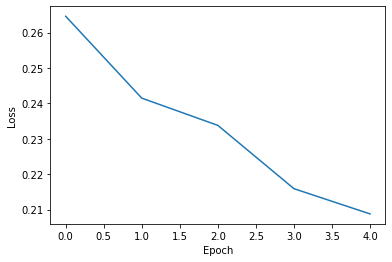

In [28]:
import matplotlib.pyplot as plt

plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Accuracy on test set

In [29]:
accuracy(X_test, Y_test, theta)

0.7575757575757576

## How to improve accuracy ?

* We could improve that by training in a bit longer
* We could also have better loss function, variational circuits
* We could also do some normalization on the input data

## Classical machine learning model (SVM)

In [30]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

print(clf.predict(X_test))
print(Y_test)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1]


## References

* https://www.youtube.com/watch?v=5Kr31IFwJiI
* https://www.youtube.com/watch?v=AoiI507OpEY